In [1]:
# Impor the packages for CAPM output for Apple Stock
import statsmodels.api as am
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime
import time

C:\Users\patri\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


### Getting data

For stocks it makesmuch more sense to take up to data data. We will use Pandas Datareader to grab data from Yahoo Finance.

In [2]:
# Install Pandas 'Datareader'
!pip install pandas-datareader

# Import data from the web from 'pandas_datareader'
from pandas_datareader import data as web

### The datareader is a package that allows us to create a Pandas DF object using data sources from the internet. 

The Datareader requires two arguments
* Ticker: name of the stock we want to get the data for
* Website: name of the website we are pulling data from

In [6]:
# Set the start date
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 1 , 1)

In [7]:
# We also have to S&P data, use the pandas-datareader to get SPY in order to track the S&P 500 index

# User the Pandas Datareader to pull data from the web
# Specify the 'ticket' and website as well as start and end dates
df_spy = web.DataReader('SPY', 'yahoo', start, end)

df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,375.450012,364.820007,375.309998,368.790009,110210800.0,361.251160
2021-01-05,372.500000,368.049988,368.100006,371.329987,66426200.0,363.739227
2021-01-06,376.980011,369.119995,369.709991,373.549988,107997700.0,365.913818
2021-01-07,379.899994,375.910004,376.100006,379.100006,68766800.0,371.350372
2021-01-08,381.489990,377.100006,380.589996,381.260010,71677200.0,373.466248


### Now that we have the market data, let's focus on APPL

Repeat the previous processs and pull data from yahoo finance

In [8]:
# Pull Apples stock index 
df_apple = web.DataReader('AAPL', 'yahoo', start, end)

# Print the results
df_apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.264999
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.850830
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.479858
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.761627
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.881622


### Checking relationships and cumulative returns

CAPM assumes that there is a relationship between the stock's performance and the market. We can use the plot() function to check the closing stock prices for APPLE and SPY data on a line chart

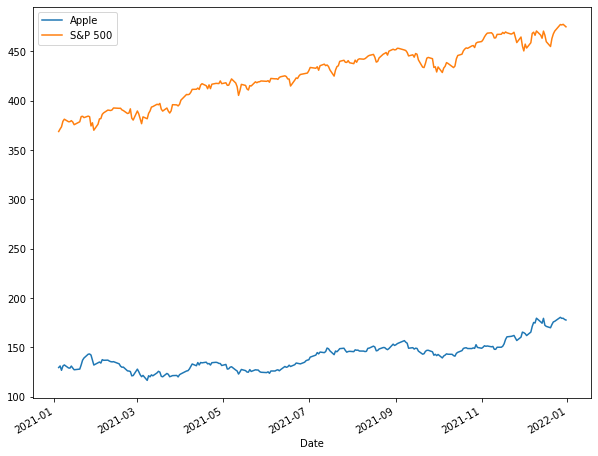

In [10]:
# Closing stock price line plot for APPL
df_apple['Close'].plot(label = 'Apple', figsize = (10, 8))

# Closing stock price line plot for 'SPY'
df_spy['Close'].plot(label = 'S&P 500')
plt.legend()

### Interpretation

Since the shapes are somewhat similar (trajectory and shape) we can perform statistical tests on them

Let's find the cumulative returns over a period of time of each and plot them on a graph

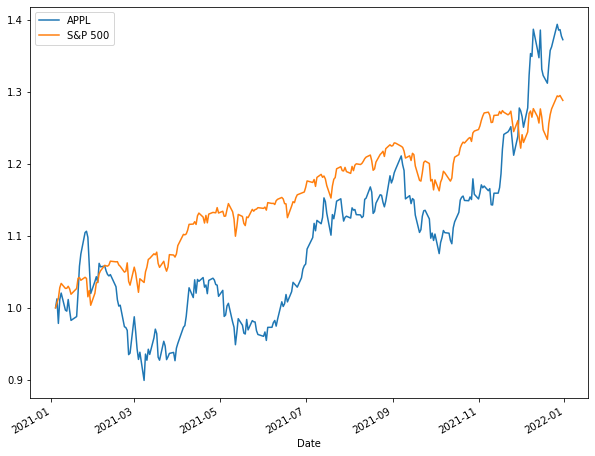

In [12]:
# Calculate the cumulative sum of closing prices for APPL
# Store sum in a new column called 'CUM'
df_apple['CUM'] = df_apple['Close']/df_apple['Close'].iloc[0]

# Calculate the cumulative sum of closing prices fpr SPY stocks
# Store sum in a new column called 'CUM'
df_spy['CUM'] = df_spy['Close']/df_spy['Close'].iloc[0]

# Plot the line graph for the calculated column 'CUM' for apple and spy
df_apple['CUM'].plot(label = 'APPL', figsize = (10, 8))
df_spy['CUM'].plot(label = 'S&P 500')
plt.legend()

### There seems to be a correlation, lets visualize it for the daily returns to understand better how the two are related

* Calculate daily returns for both appl and spy using pct_change()
* Calculate percentage change betwen current and prior element using pct_change()
* Plot the daily returns on a scatter plot

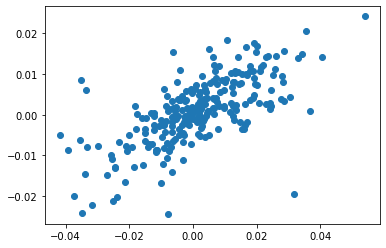

In [13]:
# Calculate daily returs  and percentage change using 'pandas pct_change()'
df_apple['daily_ret'] = df_apple['Close'].pct_change(1)
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)

# Plot the daily returns on a scatterplot:
plt.scatter(df_apple['daily_ret'], df_spy['daily_ret'])

**There seems to be somewhat of a relationship between the two variables**
Now we can draw the trend line. However we need to join the datasets first.

In [14]:
# Join the datasets using concat function
daily_prices = pd.concat([df_apple['Close'], df_spy['Close']], axis = 1)

# Set column labels.
daily_prices.columns = ['Apple', 'SPY']

# Print the first five rows of the new table
daily_prices.head()

,Apple,SPY
Date,,
2021-01-04,129.410004,368.790009
2021-01-05,131.009995,371.329987
2021-01-06,126.599998,373.549988
2021-01-07,130.919998,379.100006
2021-01-08,132.050003,381.260010


In [15]:
# After joining the dataset we can now check the percentage changes for both stocks 

# Get the daily returns
daily_returns = daily_prices.pct_change(1)

# Print the percentage change
daily_returns.head()

,Apple,SPY
Date,,
2021-01-04,NaN,NaN
2021-01-05,0.012364,0.006887
2021-01-06,-0.033662,0.005979
2021-01-07,0.034123,0.014857
2021-01-08,0.008631,0.005698


In [16]:
# Since the first entry has no value because we don't have the previous day to compare the changes, we can drop it

# Remove the first row
clean_daily_returns = daily_returns.dropna(axis = 0)

# Print the new DataFrame
clean_daily_returns.head()

,Apple,SPY
Date,,
2021-01-05,0.012364,0.006887
2021-01-06,-0.033662,0.005979
2021-01-07,0.034123,0.014857
2021-01-08,0.008631,0.005698
2021-01-11,-0.023249,-0.006741


### Apply sklearn to run a regression model and call the elements

In [17]:
# Reshape the SPY data to 2D
x = clean_daily_returns['SPY'].values.reshape(-1, 1)

# Reshape the Apple data to 2D
y = clean_daily_returns['Apple'].values.reshape(-1, 1)

In [18]:
# New we can run a regression test with sklearn using LinearRegression() and .fit()

# Run the linreg test
lr = LinearRegression()

# Fit the model
lr.fit(x, y)

LinearRegression()

In [19]:
# Check the coefficient or slope of the regression line
print(lr.coef_)

# Check the intercept c
print(lr.intercept_)

[[1.30313819]]
[2.68456838e-05]


Now that we have the equation let's look at the numbers

* Current yield of the 10 year treasury bond is 1.72%
* Average access annual return of the US stocks is 10%

So the equation would be

Expected Return of Apple = 1.72 + 1.3(10.5 - 1.72)

### Drawing the best fitting line

Let's now add the trend line that fits the daily returns data points we will use the linear eequation to plot the regression line.

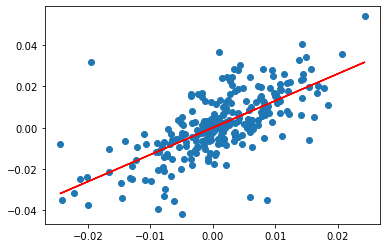

In [20]:
# Set the x coefficient and constant (intercept)
y_pred = lr.coef_ * x + lr.intercept_

# Draw the scatterplot using Matplotlib
plt.scatter(x,y)

# Plot x and predicted y as a line and set the color to red.
plt.plot(x, y_pred, color = 'red')